Add Imports

In [1]:
from models import hog_svm_model, sift_bovw_svm_model, simple_cnn_model, transfer_learning_model
from utilities import path_retrievers, model_evaluator
import os

Define Utilities

In [2]:
path_retriever = path_retrievers.PathRetrievers()

def evaluate_model(model, model_name):
    save_path = os.path.join(path_retriever.path_to_export_trained_models, model_name)
    evaluator = model_evaluator.ModelEvaluator(model=model, model_path=save_path)
    y_true, y_pred = evaluator.evaluate(path_retriever.path_to_dataset_test_images, path_retriever.path_to_dataset_test_labels)
    evaluator.create_confusion_matrix(y_true=y_true, y_pred=y_pred)

Evaluate HOG + SVM

Accuracy: 0.8384
Precision: 0.8335
Recall: [0.47058824 0.91494845 0.26315789]
F1-Score: 0.8344
Confusion Matrix:
[[ 24  27   0]
 [ 28 355   5]
 [  2  12   5]]


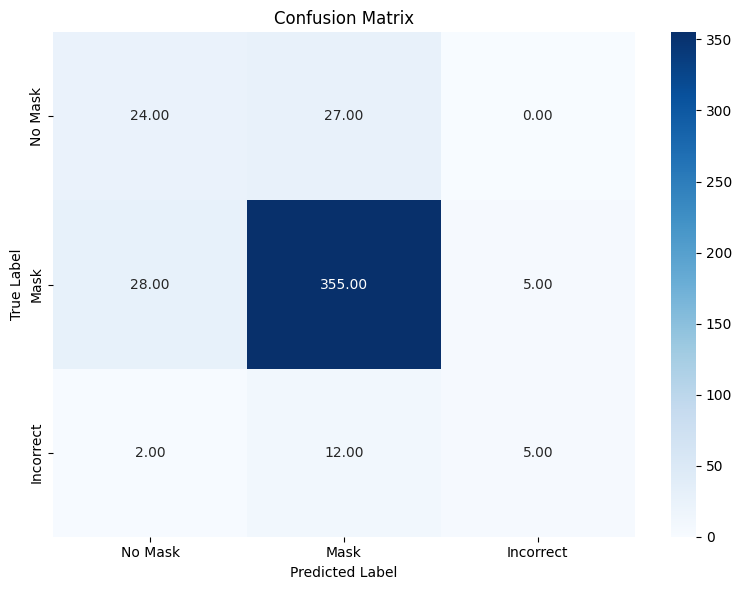

In [3]:
model = hog_svm_model.HogSvmModel()
evaluate_model(model, 'hog_svm_model.joblib')

Evaluate Sift + BoVW

Accuracy: 0.8403
Precision: 0.7977
Recall: [0.37254902 0.94315245 0.        ]
F1-Score: 0.8178
Confusion Matrix:
[[ 19  31   1]
 [ 22 365   0]
 [  2  17   0]]


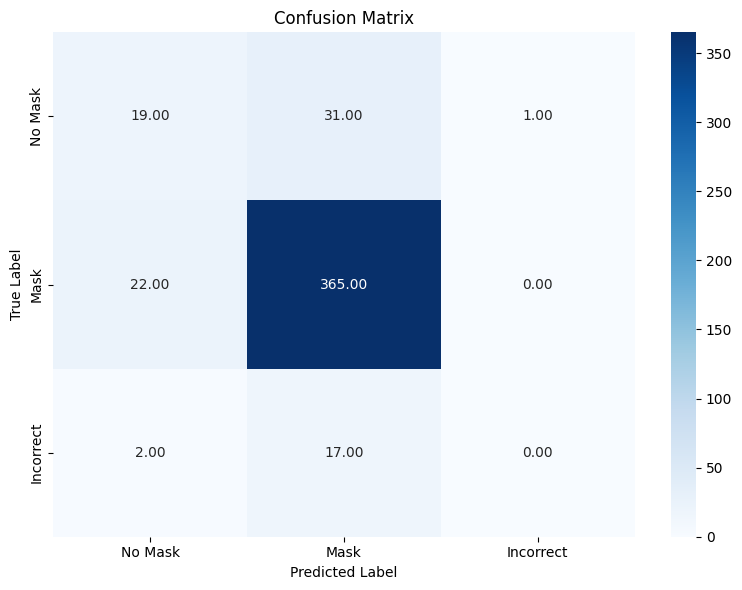

In [4]:
model = sift_bovw_svm_model.SiftBovwSvmModel()
evaluate_model(model, 'sift_bovw_svm_model.joblib')

Evaluate Simple CNN

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.9127
Precision: 0.9098
Recall: [0.84313725 0.95618557 0.21052632]
F1-Score: 0.9112
Confusion Matrix:
[[ 43   5   3]
 [  7 371  10]
 [  2  13   4]]


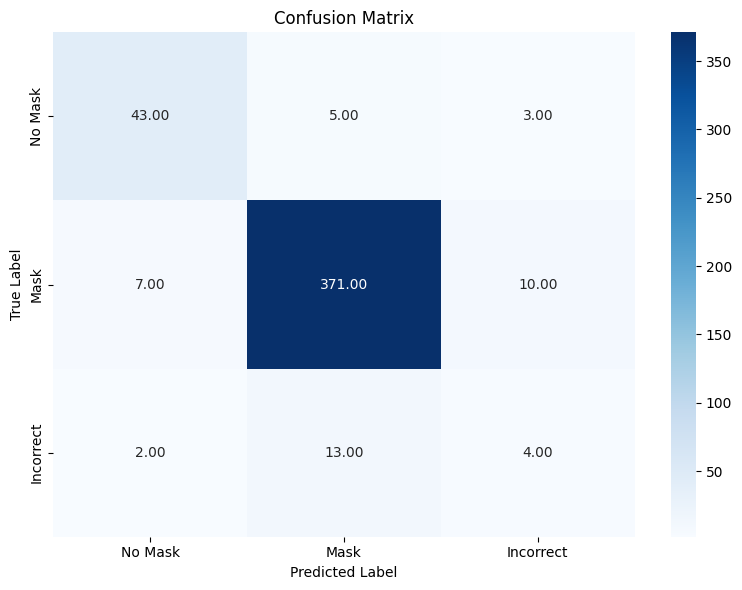

In [5]:
model = simple_cnn_model.SimpleCNNModel()
evaluate_model(model, 'simple_cnn_model.keras')

Evaluate Transfer Learning

C:\Users\furqa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 52 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step
Accuracy: 0.8472
Precision: 0.7177
Recall: [0. 1. 0.]
F1-Score: 0.7771
Confusion Matrix:
[[  0  51   0]
 [  0 388   0]
 [  0  19   0]]


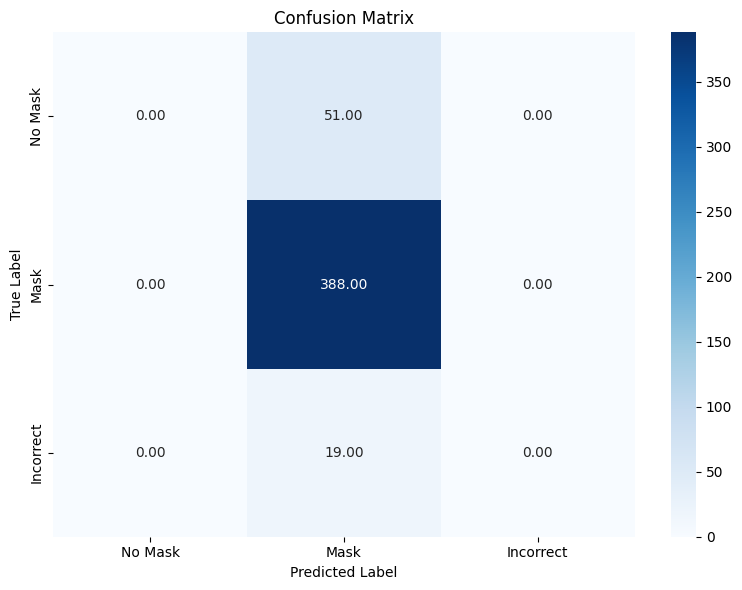

In [7]:
model = transfer_learning_model.TransferLearningModel()
evaluate_model(model, 'transfer_learning.keras')

Evaluate Transfer Learning Without Oversampling but Balancing the Dataset

C:\Users\furqa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 52 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step
Accuracy: 0.0415
Precision: 0.0017
Recall: [0. 0. 1.]
F1-Score: 0.0033
Confusion Matrix:
[[  0   0  51]
 [  0   0 388]
 [  0   0  19]]


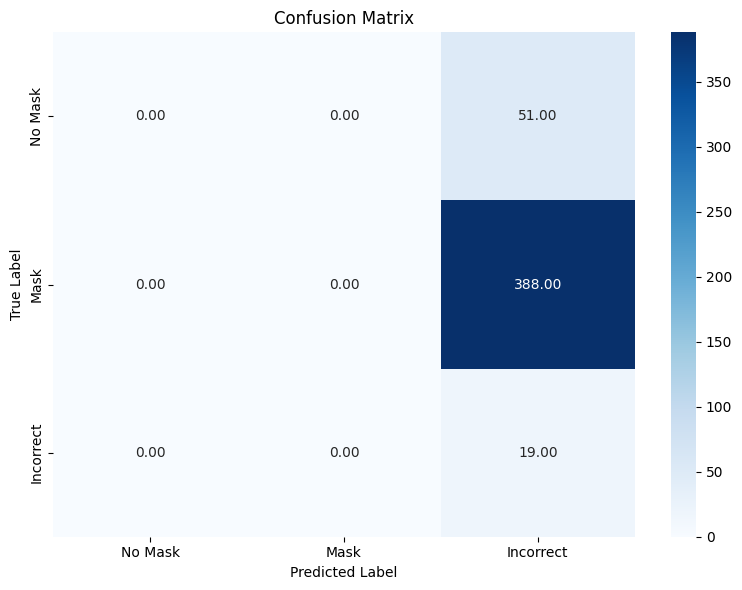

In [8]:
model = transfer_learning_model.TransferLearningModel()
evaluate_model(model, 'transfer_learning_oversampled.keras')

In [4]:
import os

train_labels_path = path_retriever.path_to_dataset_train_labels

label_counts = {0: 0, 1: 0, 2: 0}
for filename in os.listdir(train_labels_path):
    if filename.endswith('.txt'):
        with open(os.path.join(train_labels_path, filename), 'r') as f:
            label = int(f.read().strip())
            label_counts[label] += 1

print(label_counts)

{0: 376, 1: 1940, 2: 78}
